# Support Vector Machines
# 支援向量機

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

建立100個隨機對象的年齡和收入資料的虛擬資料，並進行分群(K-Means做範例)：

In [1]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

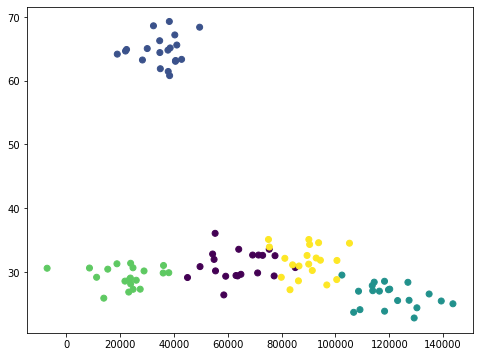

In [2]:
%matplotlib inline
from pylab import *

(X, y) = createClusteredData(100, 5) # 建立100個隨機對象 分佈在5個不同的集群中

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

現在，我們將使用線性 SVC 將資料分成多個集群：

In [3]:
from sklearn import svm, datasets

C = 1.0  # 誤差處罰項 預設為 1
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

在圖表上建立網格形狀，再將SVC模型中的每個分類用不同顏色繪製在網格上，在繪製出原始資料：

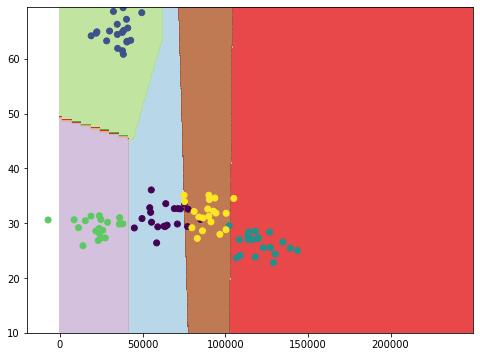

In [4]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

Or just use predict for a given point:

如果不想要視覺化，使用SVC模型的predict()函數，透過傳入一個特徵陣列得到結果：

In [5]:
print(svc.predict([[200000, 40]]))

[2]


In [6]:
print(svc.predict([[50000, 65]]))

[1]


## Activity

"Linear" is one of many kernels scikit-learn supports on SVC. Look up the documentation for scikit-learn online to find out what the other possible kernel options are. Do any of them work well for this data set?

"SVM"是 SVC 的核函數之一。找出不同核函數嘗試一下結果會如何?

In [7]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svm = svm.SVR(kernel='rbf', 
        C=0.1, gamma=0.1)
svr =svm.fit(X, y)

In [11]:
print(svr.predict([[200000, 40]]))

[2.]


In [12]:
print(svr.predict([[50000, 65]]))

[2.]
